# 掩膜可视化演示

本笔记本演示 `mask` 模块中包含的各种掩膜类型的生成和可视化。

In [3]:
# 导入必要的库
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# 获取当前 notebook 所在目录
current_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()

# 添加项目根目录（即 src 的上级）
project_root = os.path.abspath(os.path.join(current_dir, "../.."))
if project_root not in sys.path:
    sys.path.append(project_root)

print("✅ 已添加项目根目录到 sys.path:", project_root)

# 设置绘图样式
plt.rcParams['figure.figsize'] = (15, 10)

# -------------------------------
# ✅ 全局字体设置
# -------------------------------
plt.rcParams['font.family'] = ['STHeiti', 'Arial']
plt.rcParams['axes.unicode_minus'] = False             # 正确显示负号
plt.rcParams['font.size'] = 14                         # 默认字体大小
plt.rcParams['axes.titlesize'] = 16                    # 标题字体大小
plt.rcParams['axes.labelsize'] = 14                    # 坐标轴标签字体大小
plt.rcParams['xtick.labelsize'] = 12                   # x轴刻度字体大小
plt.rcParams['ytick.labelsize'] = 12                   # y轴刻度字体大小
plt.rcParams['legend.fontsize'] = 12                   # 图例字体大小
plt.rcParams['figure.titlesize'] = 18                  # 整个图形标题字体大小

from src.utils.mask import CodedAperture, MultiLensArray, PhaseContour, FresnelZoneAperture, RandomBinaryMask


✅ 已添加项目根目录到 sys.path: /Users/qiujinyu/Computational_Imaging/无透镜相关代码仓库/SLMImagingPipeline


## 1. CodedAperture - 编码孔径掩膜 (FlatCam)

编码孔径掩膜使用 MURA 或 MLS 方法生成伪随机二值模式。

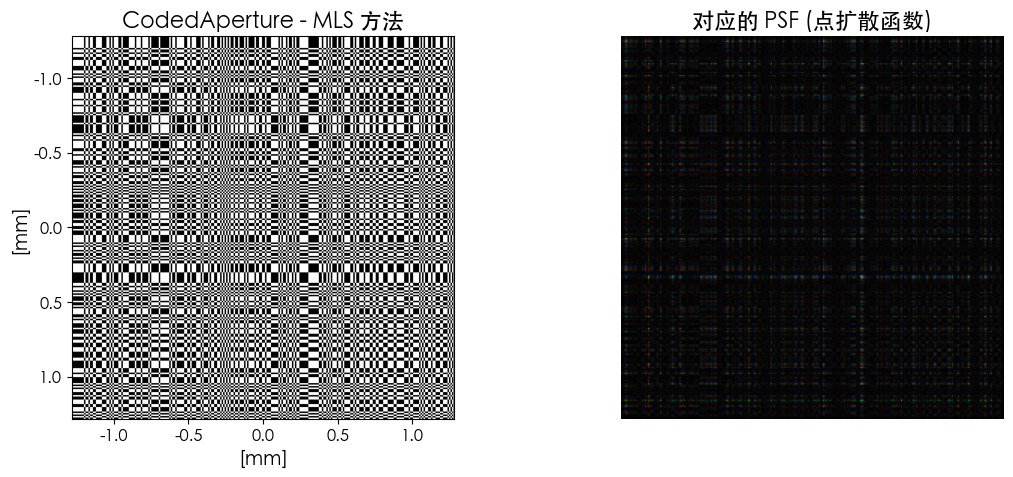

掩膜分辨率: (256, 256)
掩膜尺寸: [2.56 2.56] mm
掩膜形状: (256, 256)


In [ ]:
# 创建 MLS 方法的编码孔径掩膜
coded_aperture_mls = CodedAperture(
    method="MLS",
    n_bits=8,
    resolution=(256, 256),
    feature_size=1e-5,  # 10 微米像素
    distance_sensor=4e-3,  # 4mm 到传感器的距离
)

# 绘制掩膜
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
coded_aperture_mls.plot(ax=axes[0])
axes[0].set_title("CodedAperture - MLS 方法")

# 显示 PSF
if coded_aperture_mls.psf is not None:
    psf_rgb = coded_aperture_mls.psf / coded_aperture_mls.psf.max()
    axes[1].imshow(psf_rgb)
    axes[1].set_title("对应的 PSF (点扩散函数)")
    axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"掩膜分辨率: {coded_aperture_mls.resolution}")
print(f"掩膜尺寸: {coded_aperture_mls.size * 1e3} mm")
print(f"掩膜形状: {coded_aperture_mls.mask.shape}")

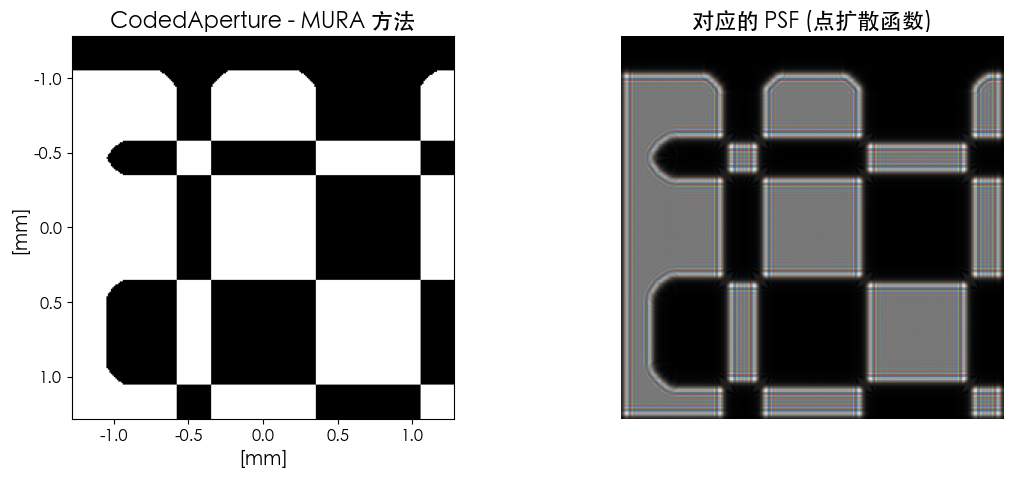

In [ ]:
# 创建 MURA 方法的编码孔径掩膜 (需要质数)
coded_aperture_mura = CodedAperture(
    method="MURA",
    n_bits=11,  # 使用质数
    resolution=(256, 256),
    feature_size=1e-5,
    distance_sensor=4e-3,
)

# 绘制掩膜
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
coded_aperture_mura.plot(ax=axes[0])
axes[0].set_title("CodedAperture - MURA 方法")

# 显示 PSF
if coded_aperture_mura.psf is not None:
    psf_rgb = coded_aperture_mura.psf / coded_aperture_mura.psf.max()
    axes[1].imshow(psf_rgb)
    axes[1].set_title("对应的 PSF (点扩散函数)")
    axes[1].axis('off')

plt.tight_layout()
plt.show()

## 2. FresnelZoneAperture - 菲涅尔波带片掩膜

菲涅尔波带片是一种二值化的余弦函数掩膜。

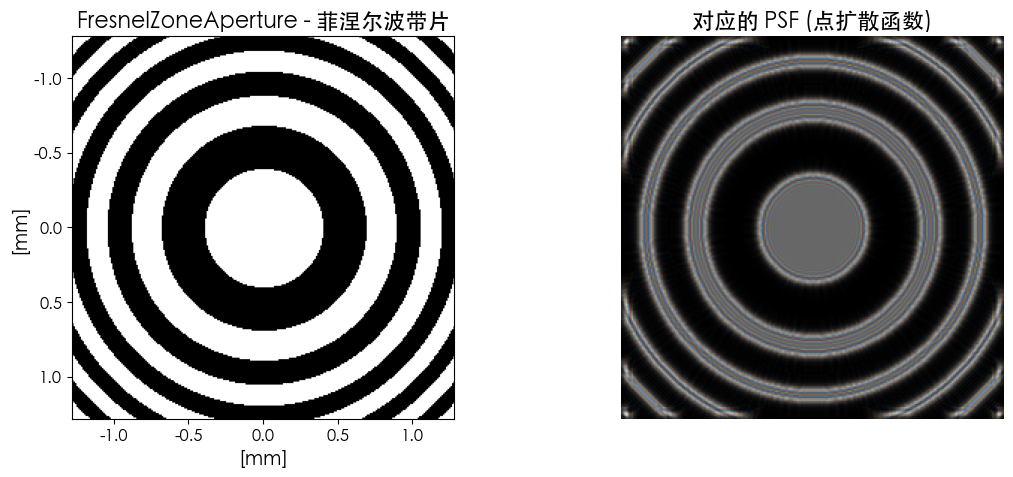

掩膜半径: 0.5599999999999999 mm
掩膜形状: (256, 256)


In [ ]:
# 创建菲涅尔波带片掩膜
fresnel_zone = FresnelZoneAperture(
    radius=0.56e-3,  # 0.56 mm 半径
    resolution=(256, 256),
    feature_size=1e-5,
    distance_sensor=4e-3,
)

# 绘制掩膜
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fresnel_zone.plot(ax=axes[0])
axes[0].set_title("FresnelZoneAperture - 菲涅尔波带片")

# 显示 PSF
if fresnel_zone.psf is not None:
    psf_rgb = fresnel_zone.psf / fresnel_zone.psf.max()
    axes[1].imshow(psf_rgb)
    axes[1].set_title("对应的 PSF (点扩散函数)")
    axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"掩膜半径: {fresnel_zone.radius * 1e3} mm")
print(f"掩膜形状: {fresnel_zone.mask.shape}")

## 3. MultiLensArray - 多透镜阵列掩膜

多透镜阵列掩膜包含多个随机分布的微透镜。

Placed circle with rad 0.00019260714596148744, and center (0.00023737400996399165, 0.0023019532305664937)
Placed circle with rad 0.0001799264218662403, and center (0.0020114227307791127, 0.0006471037123894237)
Placed circle with rad 0.00015979909127171078, and center (0.0005671600782614819, 0.000570698888477077)
Placed circle with rad 0.00015621088666940684, and center (0.0008400191275758266, 0.0013356420167064443)
Placed circle with rad 0.00014016725176148133, and center (0.0011248574071350433, 0.0008040722742396312)
Placed circle with rad 0.0001397987726295555, and center (0.0015350696156947886, 0.0004579009148817553)
Placed circle with rad 0.00010618101782710438, and center (0.0007920308858088407, 0.0009662659898310787)
Placed circle with rad 7.340279606636548e-05, and center (0.0011739883315750304, 0.001968185035291793)
Placed circle with rad 7.33991780504304e-05, and center (0.0024036639876676255, 0.0020242249874487792)
Placed circle with rad 5.871254182522992e-05, and center (0.0

/Users/qiujinyu/Computational_Imaging/无透镜相关代码仓库/SLMImagingPipeline/src/utils/gen_mask.py:776: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(radius**2 - (x - loc[1]) ** 2 - (y - loc[0]) ** 2)


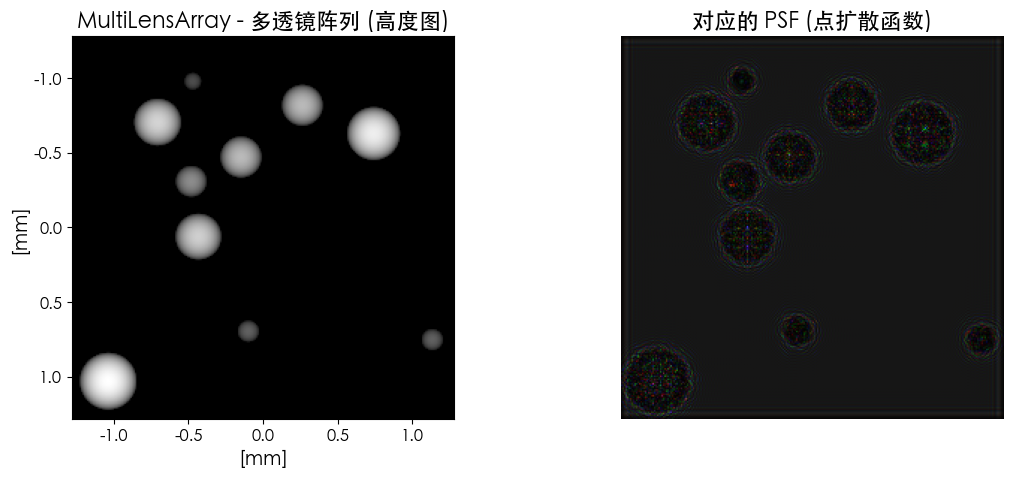

实际放置的透镜数量: 10
透镜焦距范围: 0.117 - 0.385 mm


In [ ]:
# 创建多透镜阵列掩膜
multi_lens = MultiLensArray(
    N=10,  # 10 个微透镜
    resolution=(256, 256),
    feature_size=1e-5,
    distance_sensor=4e-3,
    refractive_index=1.5,
    radius_range=(5e-5, 2e-4),  # 半径范围
    seed=42,  # 随机种子以保证可重复性
    verbose=True,
)

# 绘制掩膜 (高度图)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
multi_lens.plot(ax=axes[0])
axes[0].set_title("MultiLensArray - 多透镜阵列 (高度图)")

# 显示 PSF
if multi_lens.psf is not None:
    psf_rgb = multi_lens.psf / multi_lens.psf.max()
    axes[1].imshow(psf_rgb)
    axes[1].set_title("对应的 PSF (点扩散函数)")
    axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"实际放置的透镜数量: {multi_lens.N}")
print(f"透镜焦距范围: {multi_lens.focal_length.min()*1e3:.3f} - {multi_lens.focal_length.max()*1e3:.3f} mm")

## 4. PhaseContour - 相位轮廓掩膜 (PhlatCam)

### PhaseContour 的详细可视化

展示 PhaseContour 掩膜的生成过程。

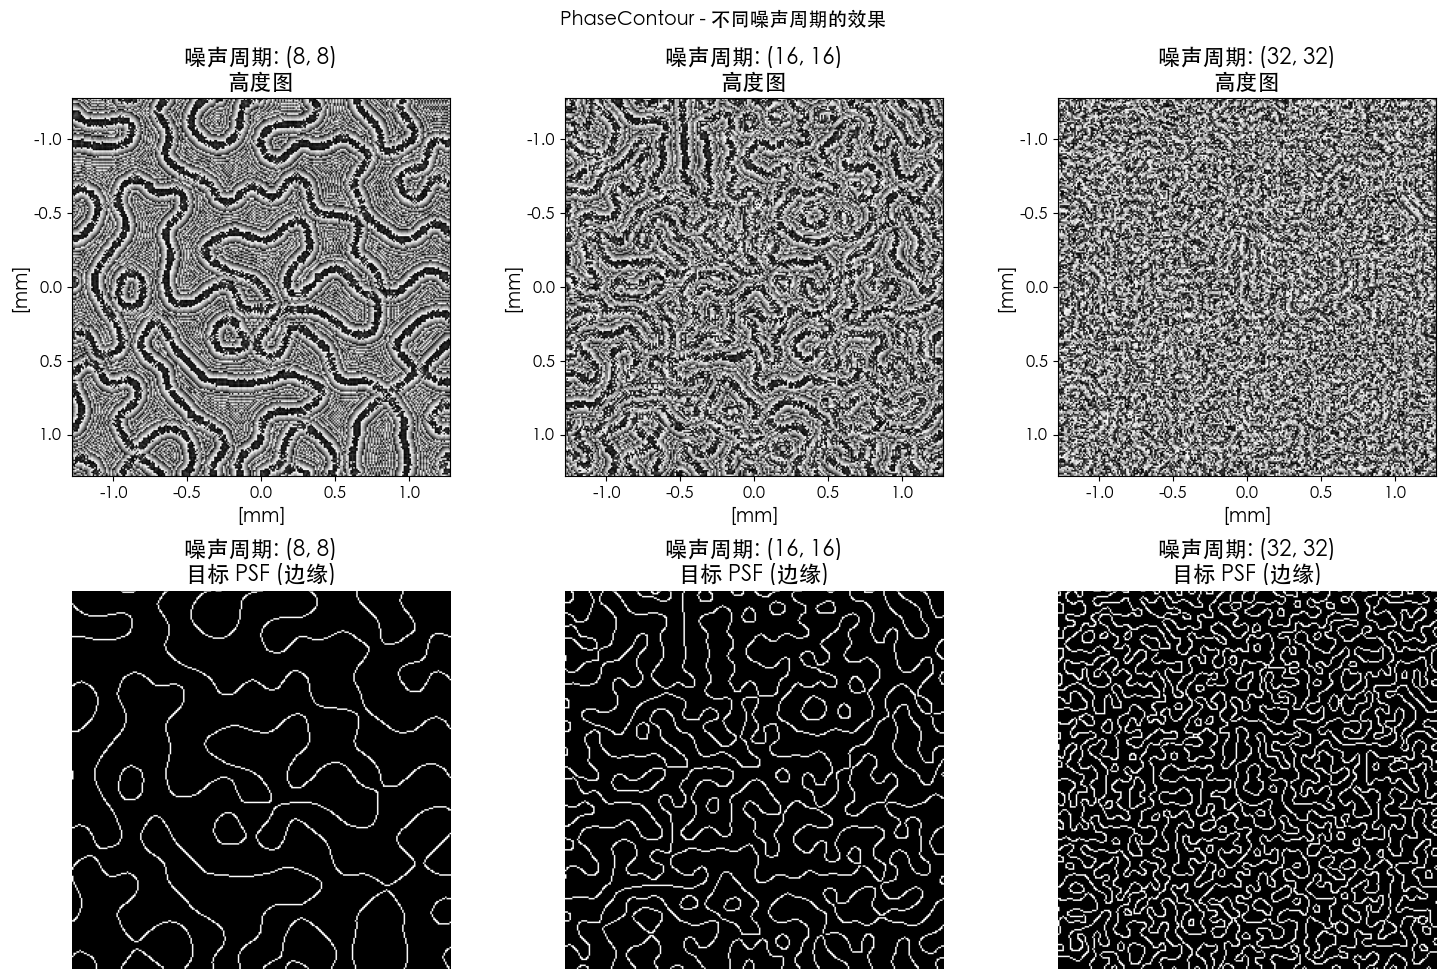

In [ ]:
# 创建一个新的 PhaseContour 以展示不同的噪声周期
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

noise_periods = [(8, 8), (16, 16), (32, 32)]

for idx, period in enumerate(noise_periods):
    pc = PhaseContour(
        noise_period=period,
        resolution=(256, 256),
        feature_size=1e-5,
        distance_sensor=4e-3,
        refractive_index=1.5,
        n_iter=10,
    )
    
    # 高度图
    pc.plot(ax=axes[0, idx])
    axes[0, idx].set_title(f"噪声周期: {period}\n高度图")
    
    # 目标 PSF
    axes[1, idx].imshow(pc.target_psf, cmap='gray')
    axes[1, idx].set_title(f"噪声周期: {period}\n目标 PSF (边缘)")
    axes[1, idx].axis('off')

plt.suptitle("PhaseContour - 不同噪声周期的效果", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

相位轮廓掩膜使用 Perlin 噪声和相位恢复算法生成。

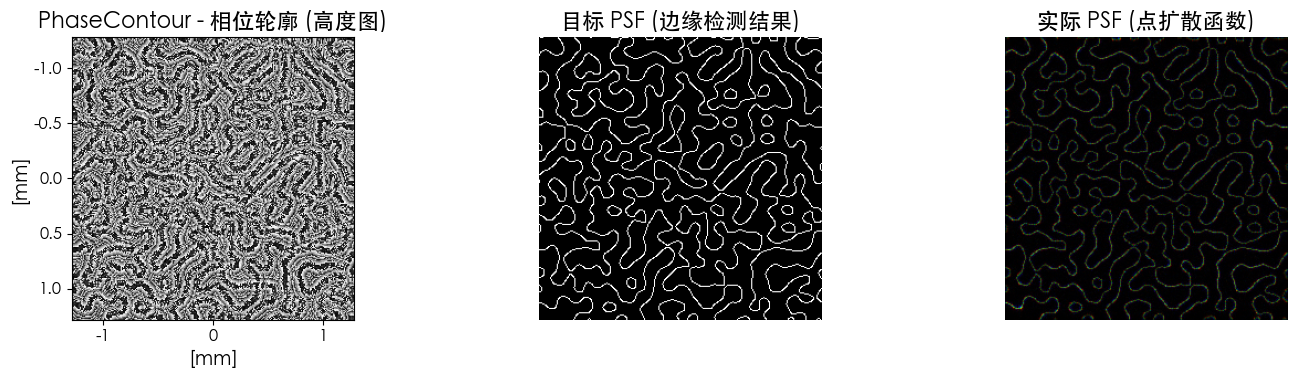

高度图范围: 0.000 - 1.064 μm


In [ ]:
# 创建相位轮廓掩膜
phase_contour = PhaseContour(
    noise_period=(16, 16),  # Perlin 噪声周期
    resolution=(256, 256),
    feature_size=1e-5,
    distance_sensor=4e-3,
    refractive_index=1.5,
    n_iter=10,  # 相位恢复迭代次数
    design_wv=532e-9,  # 设计波长 (绿光)
)

# 绘制掩膜 (高度图)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 高度图
phase_contour.plot(ax=axes[0])
axes[0].set_title("PhaseContour - 相位轮廓 (高度图)")

# 目标 PSF (边缘)
axes[1].imshow(phase_contour.target_psf, cmap='gray')
axes[1].set_title("目标 PSF (边缘检测结果)")
axes[1].axis('off')

# 实际 PSF
if phase_contour.psf is not None:
    psf_rgb = phase_contour.psf / phase_contour.psf.max()
    axes[2].imshow(psf_rgb)
    axes[2].set_title("实际 PSF (点扩散函数)")
    axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"高度图范围: {phase_contour.height_map.min()*1e6:.3f} - {phase_contour.height_map.max()*1e6:.3f} μm")

## 5. RandomBinaryMask - 随机二值掩膜

随机二值掩膜生成伪随机的二值模式，类似于随机散斑图案。

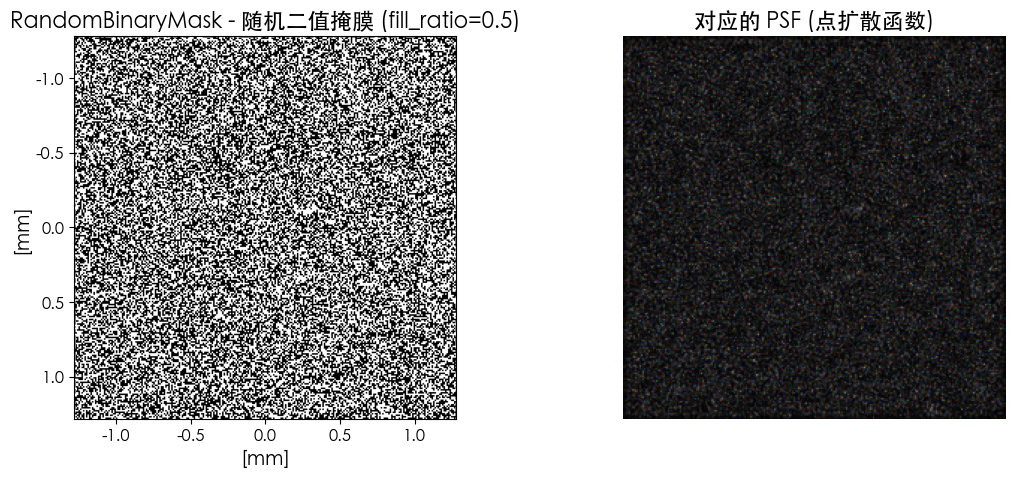

掩膜分辨率: (256, 256)
掩膜形状: (256, 256)
填充率 (1的比例): 50.01%


In [ ]:
# 创建随机二值掩膜 (默认 50% 填充率)
random_binary = RandomBinaryMask(
    fill_ratio=0.5,
    resolution=(256, 256),
    feature_size=1e-5,
    distance_sensor=4e-3,
    seed=42,  # 设置随机种子以保证可重复性
)

# 绘制掩膜
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
random_binary.plot(ax=axes[0])
axes[0].set_title("RandomBinaryMask - 随机二值掩膜 (fill_ratio=0.5)")

# 显示 PSF
if random_binary.psf is not None:
    psf_rgb = random_binary.psf / random_binary.psf.max()
    axes[1].imshow(psf_rgb)
    axes[1].set_title("对应的 PSF (点扩散函数)")
    axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"掩膜分辨率: {random_binary.resolution}")
print(f"掩膜形状: {random_binary.mask.shape}")
print(f"填充率 (1的比例): {random_binary.mask.sum() / random_binary.mask.size:.2%}")

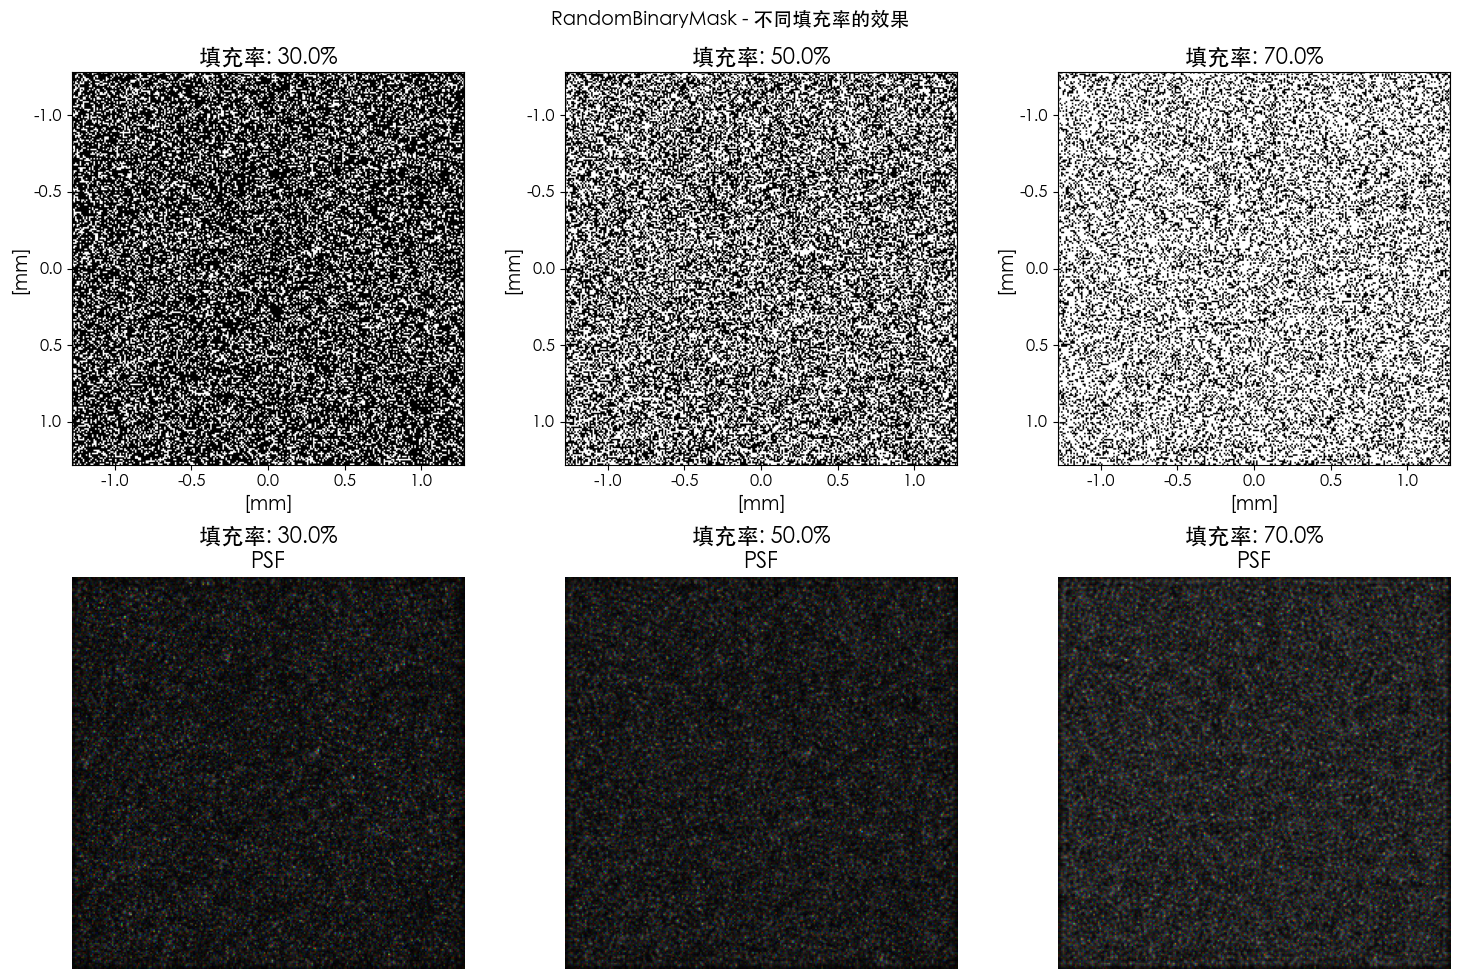

In [ ]:
# 展示不同填充率的效果
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

fill_ratios = [0.3, 0.5, 0.7]

for idx, ratio in enumerate(fill_ratios):
    rbm = RandomBinaryMask(
        fill_ratio=ratio,
        resolution=(256, 256),
        feature_size=1e-5,
        distance_sensor=4e-3,
        seed=42,
    )
    
    # 掩膜
    rbm.plot(ax=axes[0, idx])
    axes[0, idx].set_title(f"填充率: {ratio:.1%}")
    
    # PSF
    if rbm.psf is not None:
        psf_rgb = rbm.psf / rbm.psf.max()
        axes[1, idx].imshow(psf_rgb)
        axes[1, idx].set_title(f"填充率: {ratio:.1%}\nPSF")
    axes[1, idx].axis('off')

plt.suptitle("RandomBinaryMask - 不同填充率的效果", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. 所有掩膜对比

将所有掩膜类型并排显示以便比较。

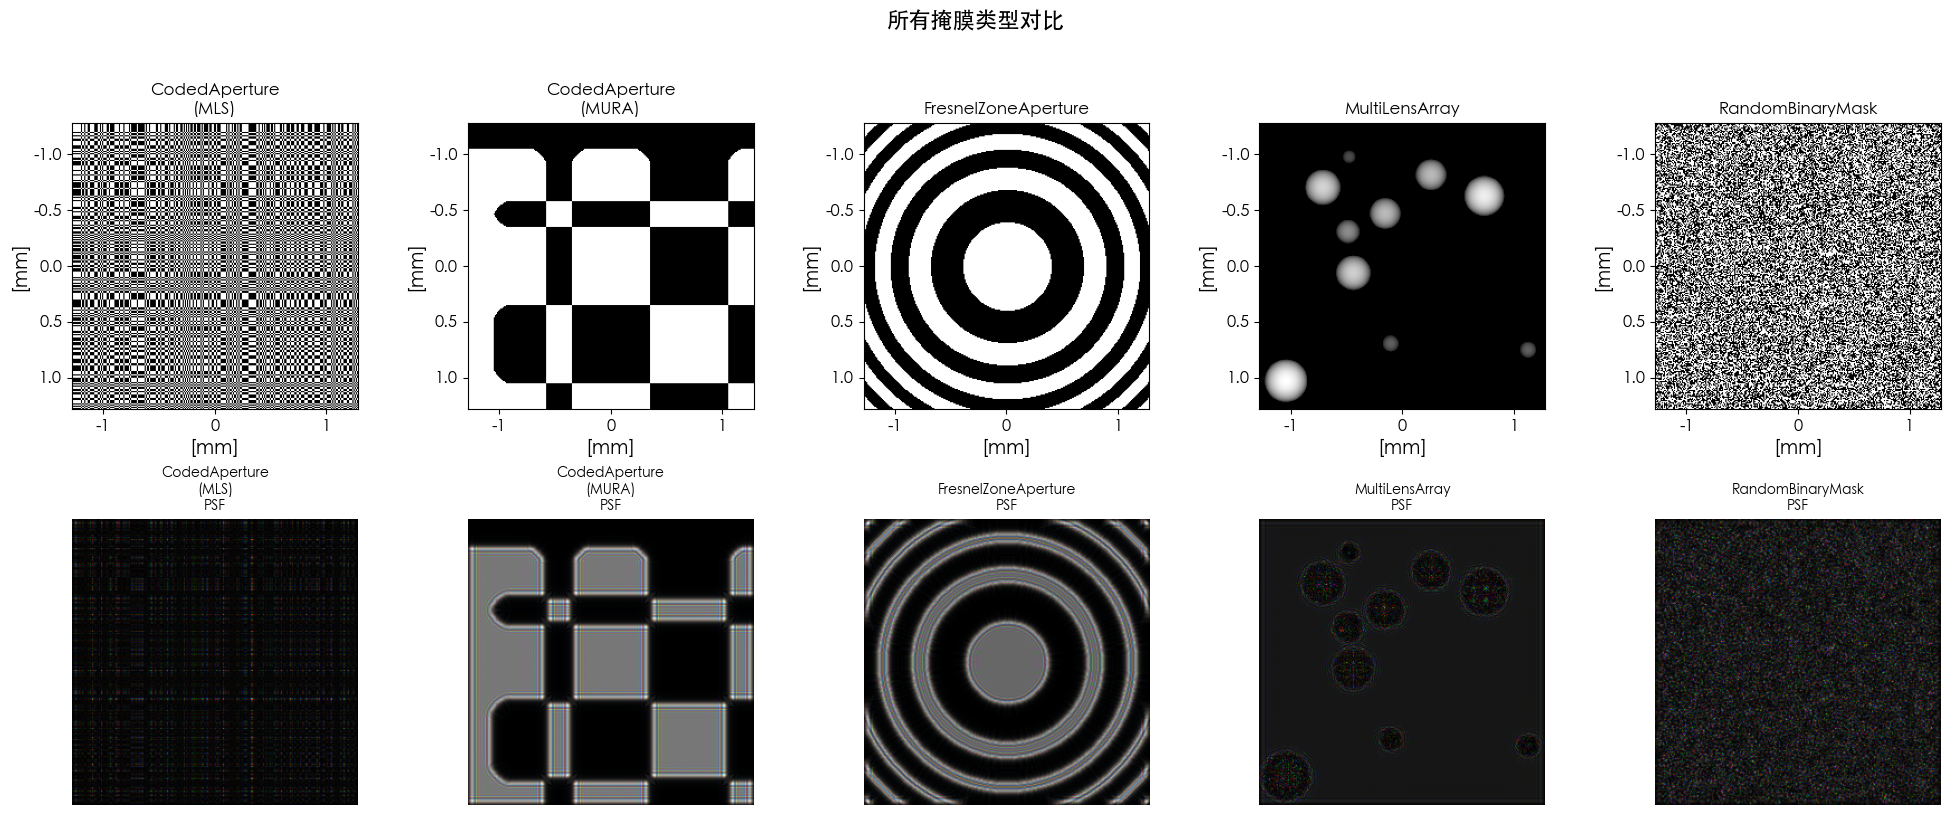

In [ ]:
# 创建一个大的对比图
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# 第一行: 掩膜本身
masks = [
    (coded_aperture_mls, "CodedAperture\n(MLS)"),
    (coded_aperture_mura, "CodedAperture\n(MURA)"),
    (fresnel_zone, "FresnelZoneAperture"),
    (multi_lens, "MultiLensArray"),
    (random_binary, "RandomBinaryMask"),
]

for idx, (mask_obj, title) in enumerate(masks):
    mask_obj.plot(ax=axes[0, idx])
    axes[0, idx].set_title(title, fontsize=12, fontweight='bold')

# 第二行: PSF
for idx, (mask_obj, title) in enumerate(masks):
    if mask_obj.psf is not None:
        psf_rgb = mask_obj.psf / mask_obj.psf.max()
        axes[1, idx].imshow(psf_rgb)
        axes[1, idx].set_title(f"{title}\nPSF", fontsize=10)
    axes[1, idx].axis('off')

plt.suptitle("所有掩膜类型对比", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 总结

本笔记本演示了 `lensless.hardware.mask` 模块中的所有掩膜类型:

1. **CodedAperture**: 使用 MLS 或 MURA 方法生成的伪随机二值掩膜
2. **FresnelZoneAperture**: 二值化的余弦函数掩膜
3. **MultiLensArray**: 包含多个随机分布的微透镜阵列
4. **PhaseContour**: 基于 Perlin 噪声和相位恢复的相位掩膜
5. **RandomBinaryMask**: 随机生成的二值掩膜，类似于随机散斑图案

每种掩膜都有其独特的光学特性和应用场景。